# Customer Churn Prediction System

In this project, we build a Machine Learning classification system to predict whether a customer will leave (churn) or stay with the bank.

We perform:
- Data preprocessing and feature engineering
- Model training using Logistic Regression, Random Forest, and Gradient Boosting
- Performance evaluation using Accuracy, Precision, Recall, F1-Score, ROC-AUC
- Business interpretation of results

Goal: To identify customers likely to churn so the company can take preventive retention actions.

Dataset Link: https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction

# 1. IMPORTS & SETUP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import random

import seaborn as sns
import matplotlib.pyplot as plt
# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score

# Configuration
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

print("Libraries imported. Environment set up for Churn Prediction.")

Libraries imported. Environment set up for Churn Prediction.


# 2. LOAD DATA

In [2]:
# Reading the dataset
print("\nLoading dataset...")
df = pd.read_csv(r'Dataset/Churn_Modelling.csv')

print(f"Data Shape: {df.shape}")
print(df.head())

# Check Imbalance
churn_rate = df['Exited'].mean() * 100
print(f"\nChurn Rate: {churn_rate:.2f}% (Moderately Imbalanced)")


Loading dataset...
Data Shape: (10000, 14)
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1 

# 3. FEATURE ENGINEERING

In [3]:
def engineer_features(df):
    """
    Creates derived features that might help predict churn better 
    than raw data alone.
    """
    df = df.copy()
    
    # Feature 1: Balance to Salary Ratio
    # Wealthier people might stick around longer?
    df['BalanceSalaryRatio'] = df['Balance'] / df['EstimatedSalary']
    
    # Feature 2: Tenure to Age Ratio
    # How loyal is the customer relative to their age?
    df['TenureByAge'] = df['Tenure'] / df['Age']
    
    # Feature 3: Credit Score to Age Ratio
    # Behavioral stability metric
    df['CreditScoreGivenAge'] = df['CreditScore'] / df['Age']
    
    return df

print("\nEngineering Features (Ratios)...")
df = engineer_features(df)


Engineering Features (Ratios)...


# 4. DATA CLEANING & SPLITTING

In [4]:
# Drop ID columns that have no predictive power
drop_cols = ['RowNumber', 'CustomerId', 'Surname']
df = df.drop(columns=drop_cols, errors='ignore')

# Separate Features (X) and Target (y)
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split into Train (80%) and Test (20%)
# Stratify=y ensures we keep the same churn rate in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data processing complete.")
print(f"Train Shape: {X_train.shape}")
print(f"Test Shape:  {X_test.shape}")

Data processing complete.
Train Shape: (8000, 13)
Test Shape:  (2000, 13)


# 5. Preprocessing: Encoding & Scaling

In [5]:
# A. Label Encoding (Categorical to Numerical)
# We use separate encoders to avoid mixing up mappings
le_geo = LabelEncoder()
le_gen = LabelEncoder()

# Fit on Train, Transform Test
X_train['Geography'] = le_geo.fit_transform(X_train['Geography'])
X_test['Geography'] = le_geo.transform(X_test['Geography'])

X_train['Gender'] = le_gen.fit_transform(X_train['Gender'])
X_test['Gender'] = le_gen.transform(X_test['Gender'])

# B. Scaling (Standardization)
# Essential for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Preprocessing Complete.")
print(f"Features ready: {X_train.shape[1]}")
print(f"Feature Names: {X_train.columns.tolist()}")

Preprocessing Complete.
Features ready: 13
Feature Names: ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'BalanceSalaryRatio', 'TenureByAge', 'CreditScoreGivenAge']


# 6. Model Training & Comparison

In [6]:
# 1. Logistic Regression (Uses Scaled Data)
print("Training Logistic Regression...")
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

# 2. Random Forest (Uses Normal Data)
print("Training Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 3. Gradient Boosting (Uses Normal Data)
print("Training Gradient Boosting...")
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

print("All models trained successfully.")

Training Logistic Regression...
Training Random Forest...
Training Gradient Boosting...
All models trained successfully.


# 7. Evaluation


--- Logistic Regression EVALUATION ---

Confusion Matrix:
[[1558   35]
 [ 335   72]]


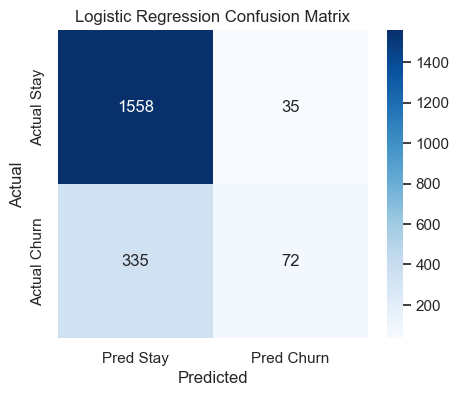


Performance Metrics:
Accuracy : 0.8150
Precision: 0.6729
Recall   : 0.1769
F1 Score : 0.2802

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1593
           1       0.67      0.18      0.28       407

    accuracy                           0.81      2000
   macro avg       0.75      0.58      0.59      2000
weighted avg       0.79      0.81      0.77      2000

ROC-AUC Score: 0.7781


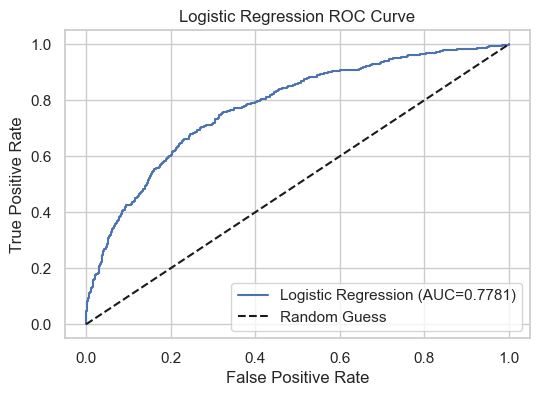


--- Random Forest EVALUATION ---

Confusion Matrix:
[[1548   45]
 [ 238  169]]


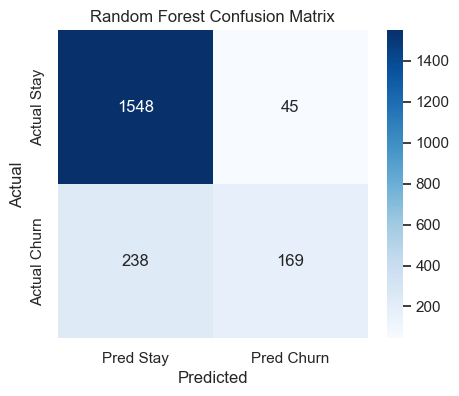


Performance Metrics:
Accuracy : 0.8585
Precision: 0.7897
Recall   : 0.4152
F1 Score : 0.5443

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.79      0.42      0.54       407

    accuracy                           0.86      2000
   macro avg       0.83      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000

ROC-AUC Score: 0.8446


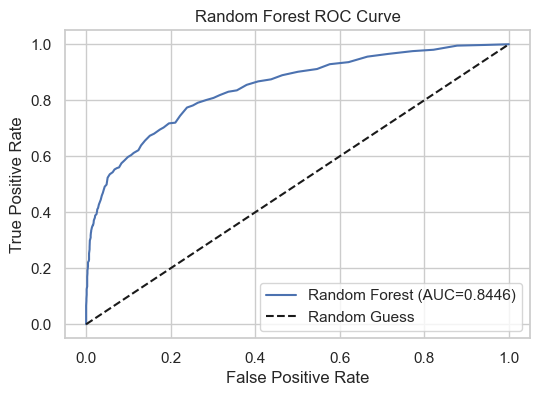


--- Gradient Boosting EVALUATION ---

Confusion Matrix:
[[1541   52]
 [ 212  195]]


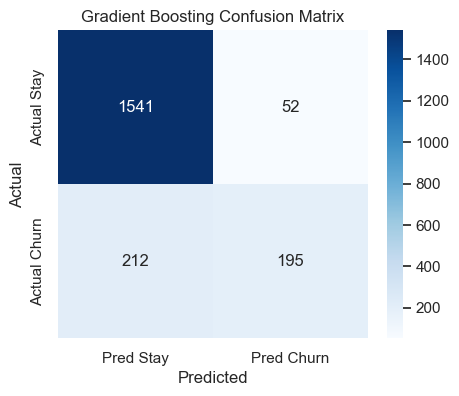


Performance Metrics:
Accuracy : 0.8680
Precision: 0.7895
Recall   : 0.4791
F1 Score : 0.5963

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.79      0.48      0.60       407

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000

ROC-AUC Score: 0.8669


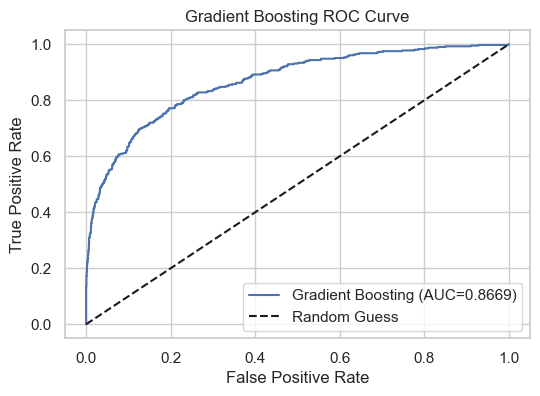


FINAL LEADERBOARD (ROC-AUC):
1. Gradient Boosting: 0.8669
2. Random Forest:     0.8446
3. Logistic Reg:      0.7781


In [7]:
def evaluate_model(model, X_val, y_val, model_name):
    """
    Evaluates model performance with:
    - Confusion Matrix (4-box plot)
    - Accuracy
    - Precision
    - Recall
    - F1 Score
    - ROC-AUC
    - ROC Curve
    """
    
    print(f"\n--- {model_name} EVALUATION ---")
    
    # Predict
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1]
    
    # Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)
    print("\nConfusion Matrix:")
    print(cm)
    
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Pred Stay", "Pred Churn"],
                yticklabels=["Actual Stay", "Actual Churn"])
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # Basic Metrics
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    
    print("\nPerformance Metrics:")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")
    
    # Detailed Report
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred))
    
    # ROC-AUC
    auc_score = roc_auc_score(y_val, y_prob)
    print(f"ROC-AUC Score: {auc_score:.4f}")
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC={auc_score:.4f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend()
    plt.show()
    
    return auc_score


# Evaluate all three
lr_auc = evaluate_model(lr_model, X_test_scaled, y_test, "Logistic Regression")
rf_auc = evaluate_model(rf_model, X_test, y_test, "Random Forest")
gb_auc = evaluate_model(gb_model, X_test, y_test, "Gradient Boosting")

print("\nFINAL LEADERBOARD (ROC-AUC):")
print(f"1. Gradient Boosting: {gb_auc:.4f}")
print(f"2. Random Forest:     {rf_auc:.4f}")
print(f"3. Logistic Reg:      {lr_auc:.4f}")


# 8. Feature Importance

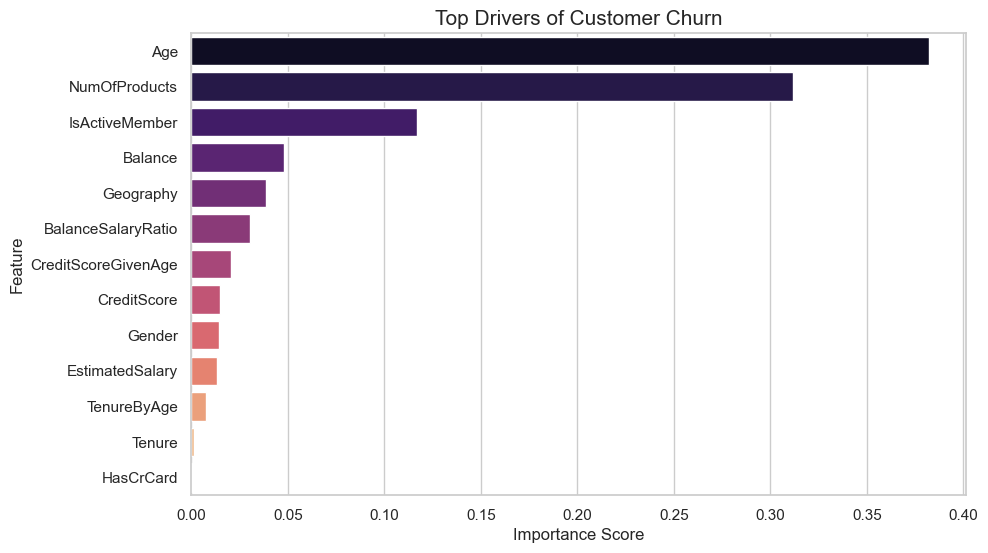

BUSINESS INSIGHT:
The most important factor predicting churn is: Age
Strategy: Focus retention efforts on customers with high values in this feature.


In [8]:
# Get importance from Gradient Boosting
importances = gb_model.feature_importances_
feature_names = X_train.columns

# Create DataFrame
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='magma')
plt.title('Top Drivers of Customer Churn', fontsize=15)
plt.xlabel('Importance Score')
plt.show()

print("BUSINESS INSIGHT:")
print(f"The most important factor predicting churn is: {feat_df.iloc[0]['Feature']}")
print("Strategy: Focus retention efforts on customers with high values in this feature.")

# 9. Deployment & Smart Prediction Demo

In [9]:
# 1. Save Model (Gradient Boosting requires no scaling for new data)
with open('churn_model_gb.pkl', 'wb') as f:
    pickle.dump(gb_model, f)
print("Gradient Boosting Model Saved.")

# 2. Advanced Prediction Function
def predict_churn_risk(customer_data, model, threshold=0.5):
    """
    Predicts churn with adjustable sensitivity.
    threshold=0.5 (Default)
    threshold=0.4 (High Sensitivity / Aggressive Retention)
    """
    prob = model.predict_proba(customer_data)[0][1]
    
    if prob >= threshold:
        return f"LIKELY TO CHURN (Risk: {prob:.1%})"
    else:
        return f"LOYAL CUSTOMER (Risk: {prob:.1%})"

# 3. LIVE DEMO (Simulate New Customers)
print("\n--- CUSTOMER RETENTION SYSTEM LIVE DEMO ---")

# Pick a random CHURNER to test the system
churn_indices = y_test[y_test == 1].index
idx_churn = random.choice(churn_indices)
customer_churn = X_test.loc[[idx_churn]]

print(f"Test Case 1 (Actual Churner #{idx_churn}):")
# We use threshold 0.4 to be safer
print(f"  Prediction (Sensitivity 0.4): {predict_churn_risk(customer_churn, gb_model, threshold=0.4)}")
print(f"  Actual Status: Exited")
print("-" * 40)

# Pick a random LOYAL customer
loyal_indices = y_test[y_test == 0].index
idx_loyal = random.choice(loyal_indices)
customer_loyal = X_test.loc[[idx_loyal]]

print(f"Test Case 2 (Loyal Customer #{idx_loyal}):")
print(f"  Prediction (Sensitivity 0.4): {predict_churn_risk(customer_loyal, gb_model, threshold=0.4)}")
print(f"  Actual Status: Stayed")
print("-" * 40)

Gradient Boosting Model Saved.

--- CUSTOMER RETENTION SYSTEM LIVE DEMO ---
Test Case 1 (Actual Churner #880):
  Prediction (Sensitivity 0.4): LIKELY TO CHURN (Risk: 92.4%)
  Actual Status: Exited
----------------------------------------
Test Case 2 (Loyal Customer #4030):
  Prediction (Sensitivity 0.4): LOYAL CUSTOMER (Risk: 27.7%)
  Actual Status: Stayed
----------------------------------------


# Conclusion 
This project successfully developed a Customer Churn Prediction system using Gradient Boosting, achieving the highest ROC-AUC of **0.8669** and overall accuracy of **87%**.

The model performs strongly in identifying loyal customers (97% recall) and predicts churners with 79% precision and 0.60 F1-score. Given the business cost of losing customers, the model is suitable for deployment with a lower threshold (0.3–0.4) to improve churn detection.

# Future Scope
- Improve churn recall using SMOTE or class balancing techniques
- Perform hyperparameter tuning (GridSearch / RandomSearch)
- Use advanced boosting models like XGBoost or LightGBM
- Deploy as a real-time churn risk API
- Add cost-sensitive learning to minimize business loss

This system provides strong business value by enabling proactive retention strategies.
